In [3]:
import pandas as pd

data = pd.read_csv('./data/bp_weather_data.csv')
data.head()

,Date,Max temperature (°C),Min temperature (°C),Wind (m/s),Precipitation (mm)
0,2017.07.01,26.0,15.0,6.1,14.0
1,2017.07.02,25.0,15.0,6.9,0.0
2,2017.07.03,25.0,16.0,6.7,0.0
3,2017.07.04,27.0,12.0,5.3,0.0
4,2017.07.05,30.0,17.0,4.2,0.0


In [25]:
data['mean_temp'] = data[['Max temperature (°C)', 'Min temperature (°C)']].mean(axis=1)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)
data.head()

,Max temperature (°C),Min temperature (°C),Wind (m/s),Precipitation (mm),mean_temp
Date,,,,,
2017-07-01,26.0,15.0,6.1,14.0,20.5
2017-07-02,25.0,15.0,6.9,0.0,20.0
2017-07-03,25.0,16.0,6.7,0.0,20.5
2017-07-04,27.0,12.0,5.3,0.0,19.5
2017-07-05,30.0,17.0,4.2,0.0,23.5


In [21]:
data.describe()

,Max temperature (°C),Min temperature (°C),Wind (m/s),Precipitation (mm),mean_temp
count,1949.00000,1949.000000,1949.000000,1949.000000,1949.000000
mean,16.93606,9.718143,4.517804,1.640072,13.327101
std,10.01492,8.192853,1.940973,3.995472,9.010664
min,-7.40000,-17.400000,0.700000,0.000000,-10.150000
25%,8.70000,3.000000,3.100000,0.000000,5.750000
50%,17.20000,9.900000,4.200000,0.000000,13.750000
75%,25.20000,16.400000,5.700000,1.300000,20.700000
max,39.70000,26.200000,14.400000,44.800000,32.950000


## General Distributions

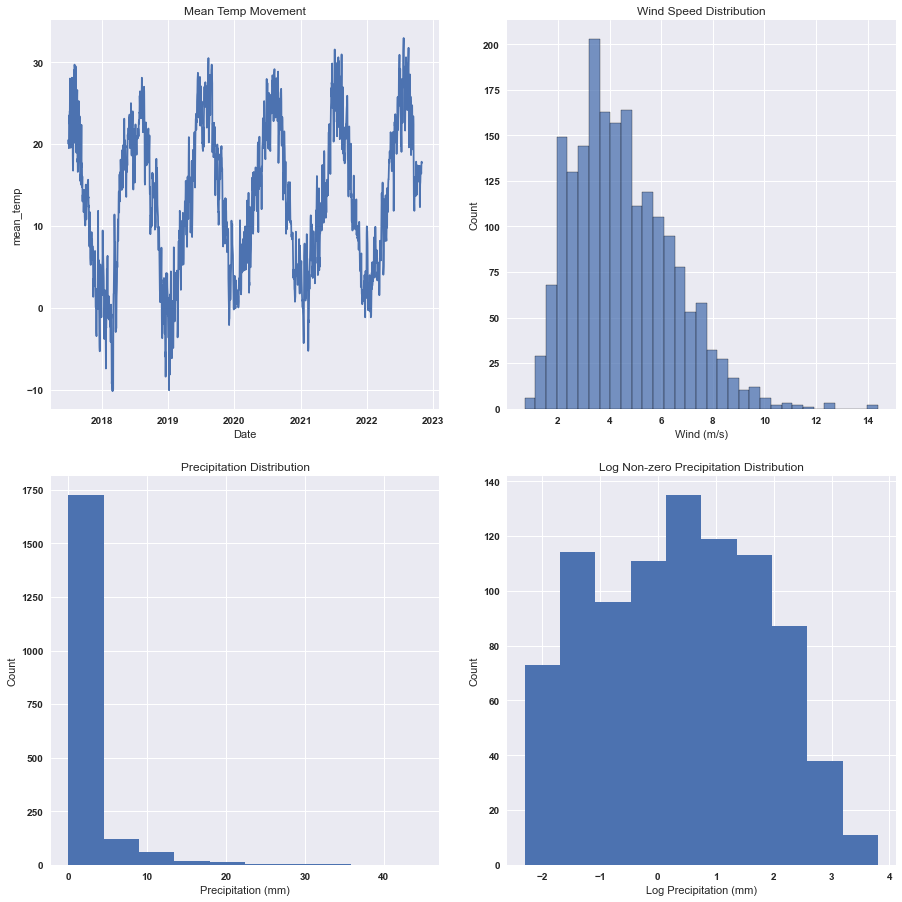

In [53]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

main_columns = ['mean_temp','Wind (m/s)','Precipitation (mm)']
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(13,13))
sns.lineplot(data=data[main_columns[0]],ax=axes[0][0])
axes[0][0].set_title('Mean Temp Movement')
sns.histplot(data=data, x=main_columns[1],ax=axes[0][1])
axes[0][1].set_title('Wind Speed Distribution')
axes[1][0].hist(data[main_columns[2]])
axes[1][0].set_title('Precipitation Distribution')
axes[1][0].set_ylabel('Count')
axes[1][0].set_xlabel('Precipitation (mm)')
non_null_precip = data[data[main_columns[2]] != 0][main_columns[2]]
axes[1][1].hist(np.log(non_null_precip))
axes[1][1].set_title('Log Non-zero Precipitation Distribution')
axes[1][1].set_ylabel('Count')
axes[1][1].set_xlabel('Log Precipitation (mm)')
plt.tight_layout()

## Correlations
### Autocorrelations of temp mean

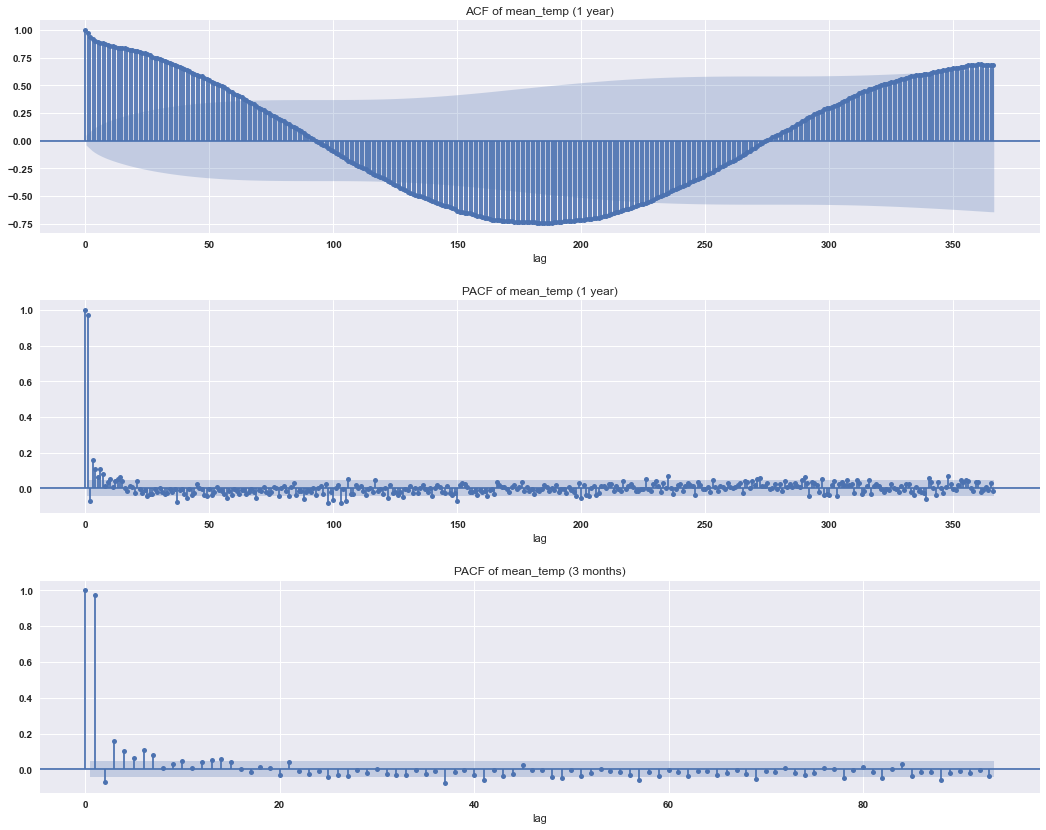

In [67]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,axes = plt.subplots(nrows=3,figsize=(15,12))
plot_acf(data['mean_temp'], lags = 366,ax=axes[0])
axes[0].set_title(f'ACF of mean_temp (1 year)')
axes[0].set_xlabel('lag')
plot_pacf(data['mean_temp'], lags = 366,ax=axes[1])
axes[1].set_title(f'PACF of mean_temp (1 year)')
axes[1].set_xlabel('lag')
plot_pacf(data['mean_temp'], lags = 93,ax=axes[2])
axes[2].set_title(f'PACF of mean_temp (3 months)')
axes[2].set_xlabel('lag')

plt.tight_layout()

### Correlation between features

C:\Users\Marci\AppData\Local\Temp\ipykernel_1428\3506506007.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scatter_matrix(data[main_columns],figsize=(8,8),ax=axes[0])
C:\Users\Marci\AppData\Local\Temp\ipykernel_1428\3506506007.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scatter_matrix(data_precip[main_columns],figsize=(8,8),ax=axes[1])


Text(0.5, 1.0, 'Only showing rainy days')

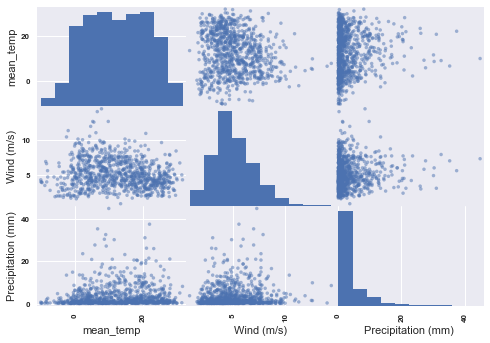

In [121]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[main_columns],figsize=(8,8))
plt.suptitle('All days and features scatter');

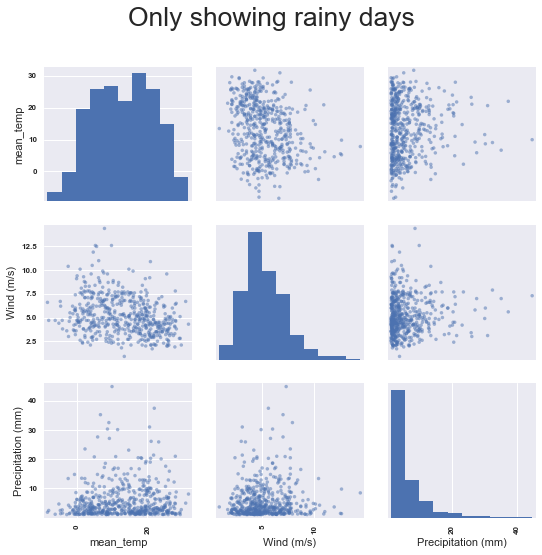

In [124]:
data_precip = data[data['Precipitation (mm)'] > 1].reset_index(drop=True)
scatter_matrix(data_precip[main_columns],figsize=(8,8))
plt.suptitle('Only showing rainy days')
plt.tight_layout()

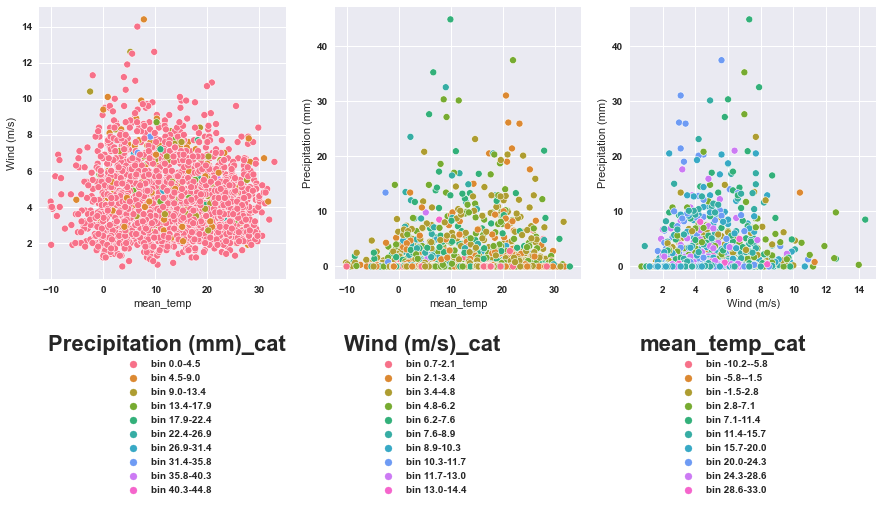

In [105]:
def get_labels(data):
    borders = np.histogram(data)[1]
    labels = [f'bin {round(borders[idx],1)}-{round(borders[idx+1],1)}' for idx in range(len(borders))[:-1]]
    return labels
for col in main_columns:
    data[f'{col}_cat'] = pd.cut(data[col],np.histogram(data[col])[1],labels=get_labels(data[col]),include_lowest=True)

fig,axes = plt.subplots(ncols=3,figsize=(15,5))
sns.scatterplot(data=data,x='mean_temp',y='Wind (m/s)',hue='Precipitation (mm)_cat',ax=axes[0])
sns.scatterplot(data=data,x='mean_temp',hue='Wind (m/s)_cat',y='Precipitation (mm)',ax=axes[1])
sns.scatterplot(data=data,hue='mean_temp_cat',x='Wind (m/s)',y='Precipitation (mm)',ax=axes[2])
for ax,hue_col in list(zip(axes,['Precipitation (mm)_cat','Wind (m/s)_cat','mean_temp_cat'])):
    ax.legend(loc='center left', bbox_to_anchor=(0, -0.5),title=hue_col)

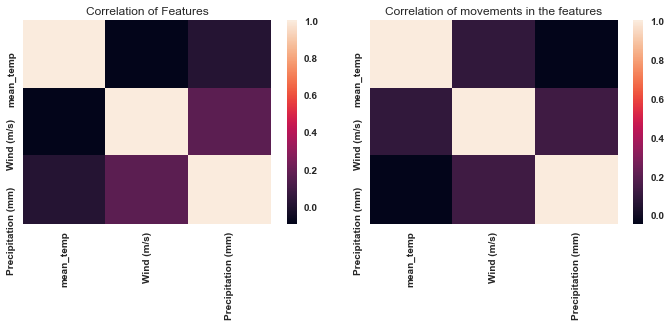

In [122]:
fig,axes = plt.subplots(ncols=2,figsize=(10,5))

sns.heatmap(data[main_columns].corr(),ax = axes[0])
axes[0].set_title('Correlation of Features')
diffed = data[main_columns].diff()
sns.heatmap(diffed.corr(),ax = axes[1])
axes[1].set_title('Correlation of movements in the features')
plt.tight_layout()

## Seasonality

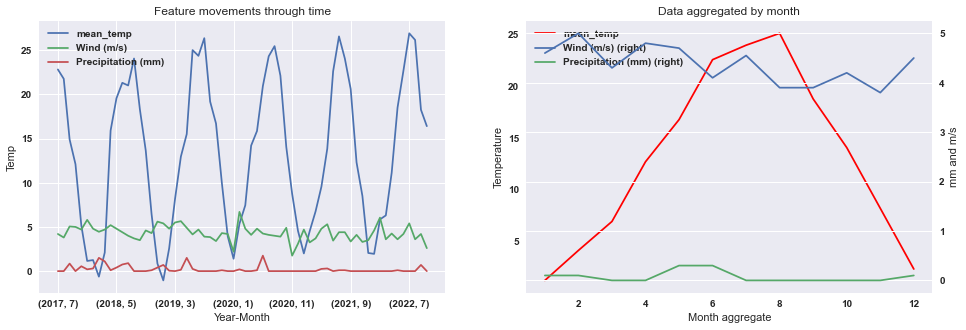

In [157]:
monthly_data = data[main_columns].groupby([data.index.year,data.index.month]).median()
fig,axes = plt.subplots(ncols=2,figsize=(16,5))
monthly_data.plot(ax=axes[0])
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Temp')
axes[0].set_title('Feature movements through time')
monthly_agg = data[main_columns].groupby([data.index.month]).median()
monthly_agg[main_columns[:1]].plot(ax=axes[1],c='r')
monthly_agg = data[main_columns].groupby([data.index.month]).median()
ax2 = monthly_agg[main_columns[1:]].plot(ax=axes[1],secondary_y=True)
axes[1].set_xlabel('Month aggregate')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Data aggregated by month')
ax2.set_ylabel('mm and m/s');

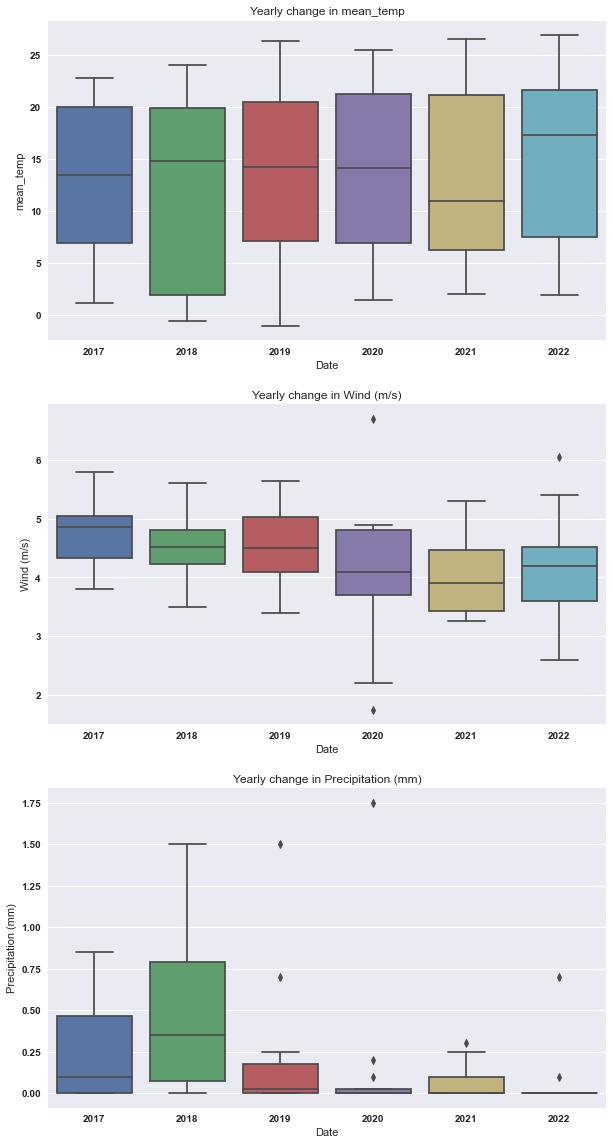

In [249]:
fig,axes = plt.subplots(nrows=3,figsize=(10,20))

for idx, colname in enumerate(main_columns):
    sns.boxplot(data=monthly_data.reset_index(level=1).drop(columns='Date').reset_index(),orient='v',x = 'Date', y=colname,ax = axes[idx])
    axes[idx].set_title(f'Yearly change in {colname}')

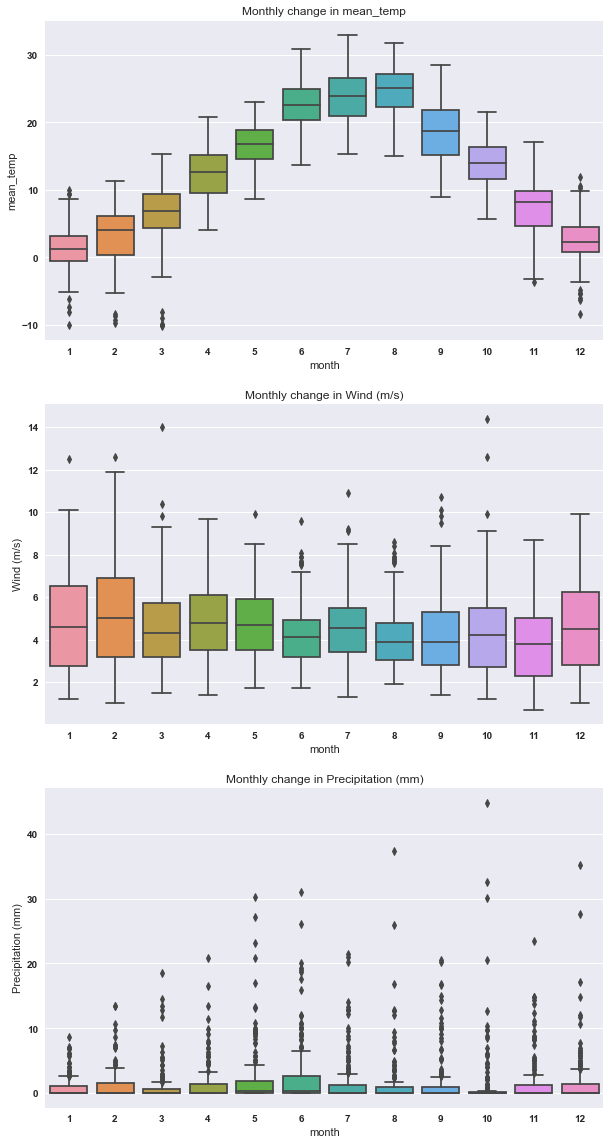

In [256]:
fig,axes = plt.subplots(nrows=3,figsize=(10,20))
data['month'] = data.index.month
for idx, colname in enumerate(main_columns):
    sns.boxplot(data=data,orient='v',x = 'month', y=colname,ax = axes[idx])
    axes[idx].set_title(f'Monthly change in {colname}')

C:\Users\Marci\AppData\Local\Temp\ipykernel_1428\2908845655.py:10: RuntimeWarning: divide by zero encountered in true_divide
  axes[idx].plot(1/xf, 2.0/N * np.abs(yf[:N//2]))
C:\Users\Marci\AppData\Local\Temp\ipykernel_1428\2908845655.py:10: RuntimeWarning: divide by zero encountered in true_divide
  axes[idx].plot(1/xf, 2.0/N * np.abs(yf[:N//2]))
C:\Users\Marci\AppData\Local\Temp\ipykernel_1428\2908845655.py:10: RuntimeWarning: divide by zero encountered in true_divide
  axes[idx].plot(1/xf, 2.0/N * np.abs(yf[:N//2]))


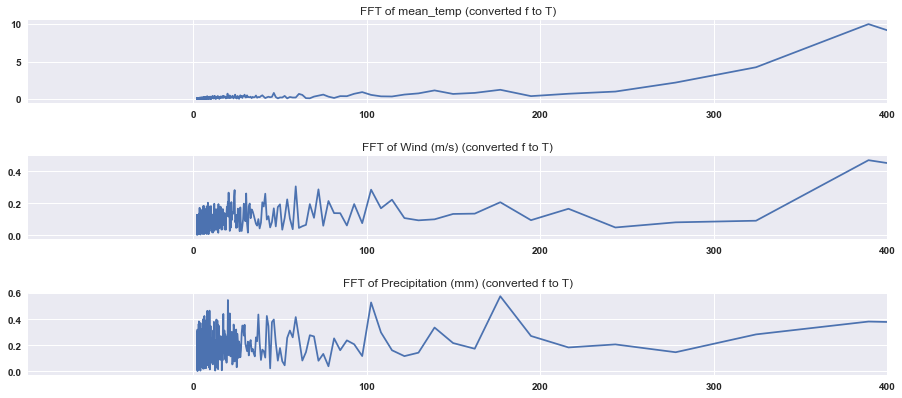

In [257]:
import scipy
from scipy.fftpack import rfft
fig, axes = plt.subplots(nrows=3,figsize=(13,6))
for idx,col in enumerate(main_columns):
    N = len(data)
    T = 1
    y = data[col].values
    yf = scipy.fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    axes[idx].plot(1/xf, 2.0/N * np.abs(yf[:N//2]))
    axes[idx].set_xlim(right=400)
    axes[idx].set_title(f'FFT of {col} (converted f to T)')
plt.tight_layout()